# LINEAR REGRESSION

- is the simplest machine learning model
- is used for finding linear relationship between target and one or more predictors
- there are two types of linear regression:
    - Simple (one feature)
    - Multiple (two or more features) 
- The main idea of linear regression is to obtain a line that best fits the data. 
- That means finding the one line for which total prediction error (for all data points) are as small as possible. (Error is the distance between actual values and values predicted using regression line.)

### First linear regression model 

First we'll create a simple linear regression model - we saw that LSTAT and RM are two variables that are highly correlated with target. We will see how good predicteions we can get with just one feature - and how to decide which one of these features is better for estimating median house price? 

Step one is to divide our dataset into training and testing part - it is important to test our model against data that has never been used for training – that tells us how the model might perform against data that it has not yet seen and it is meant to be representative of how the model might perform in the real world.

That's why we will use only 70% of our data to train the model and then we'll use the rest of data (30%) to evaluate our model. 

In [22]:
import pandas as pd
import numpy as np
import json
import graphviz
import matplotlib.pyplot as plt
from sklearn import linear_model

pd.set_option("display.max_rows",6)

%matplotlib inline

In [23]:
df_data = pd.read_csv('varsom_ml_preproc.csv', index_col=0)

In [24]:
X = df_data.filter(['mountain_weather_wind_speed_num', 'mountain_weather_precip_most_exposed'])#, 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
y = df_data['danger_level']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 222, test_size = 0.3) # split the data

lm = linear_model.LinearRegression()
model_lr = lm.fit(X_train, y_train) # train the model

predictions_lr = model_lr.predict(X_test) # predict values for test dataset

In [26]:
print(f'{model_lr.intercept_:.2f}, {model_lr.coef_}')

1.96, [-0.00599321  0.02980983]


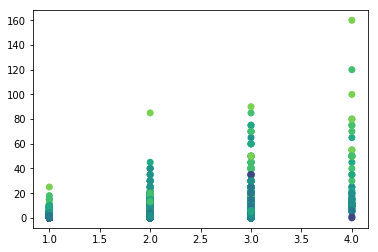

In [31]:
plt.scatter(y, X['mountain_weather_precip_most_exposed'], c=X['mountain_weather_wind_speed_num'])

In [12]:
print("Our third model:  \n \ny = {0:.2f}".format(model_lr.intercept_) + " {0:.2f}".format(model_lr.coef_[0]) + " * CRIM"
     + " + {0:.2f}".format(model_lr.coef_[1]) + " * ZN" + " + {0:.2f}".format(model_lr.coef_[2]) + " * INDUS"
     + " + {0:.2f}".format(model_lr.coef_[3]) + " + * CHAS" + " {0:.2f}".format(model_lr.coef_[4]) + " * RM" 
     + " + {0:.2f}".format(model_lr.coef_[5]) + " * AGE" + " + {0:.2f}".format(model_lr.coef_[6]) + " * RAD"
     + "\n    {0:.2f}".format(model_lr.coef_[7]) + " * TAX" + " {0:.2f}".format(model_lr.coef_[8]) + " * PTRATIO"
     + " + {0:.2f}".format(model_lr.coef_[9]) + " * B" + " {0:.2f}".format(model_lr.coef_[10]) + " * LSTAT")

IndexError: index 1 is out of bounds for axis 0 with size 1

In [4]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_data, random_state = 222, test_size = 0.3)

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
 # we are importing machine learning model we'll use

lm1 = linear_model.LinearRegression()

model_1 = lm1.fit(X_train_1, y_train_1) # we have just created a model! :) 

In [ ]:
# as we said before, the model in this simple case is a line that has two parameters

# so we ask: what are our estimated parameters? (alpha and beta?)

print("Our first model:  y = {0:.2f}".format(model_1.intercept_) + " {0:.2f}".format(model_1.coef_[0]) + " * x")

In [ ]:
print("Intercept: {0:.2f}".format(model_1.intercept_))
print("Extra price per extra unit of LSTAT: {0:.2f}".format(model_1.coef_[0]))

In [ ]:
# now we'd like is to predict house price for test data (data that model hasn't seen yet)

predictions_1 = model_1.predict(X_test_1)

In [ ]:
predictions_1[0:5]

In [ ]:
# let's visualize our regression line

plt.plot(X_test_1, y_test_1, 'o')
plt.plot(X_test_1, predictions_1, color = 'red')
plt.xlabel('% of lower status of the population')
plt.ylabel('Median home value in $1000s')

### Evaluation of your model



In [ ]:
# let's try to visualize the estimated and real house values for all data points in test dataset


fig, ax = plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(X_test_1,predictions_1, 'o')
plt.xlabel('% of lower status of the population')
plt.ylabel('Estimated home value in $1000s')


plt.subplot(1, 2, 2)
plt.plot(X_test_1,y_test_1, 'o')
plt.xlabel('% of lower status of the population')
plt.ylabel('Median home value in $1000s')

plt.tight_layout()

plt.show()

To evaulate the performance of the model, we can compute the error between the real house value (`y_test_1`) and the predicted values we got form our model (`predictions_1`).

One such metric is called **the residual sum of squares (RSS)**: 

![title](pictures/rss.png)




In [ ]:
# first we define our RSS function

def RSS(y, p):
    return sum((y - p)**2)

In [ ]:
# then we calculate RSS: 

RSS_model_1 = RSS(y_test_1, predictions_1)

RSS_model_1

This number doesn't tell us much - is 7027 good? Is it bad? 

Unfortunatelly, there is no right answer - it depends on the data. Sometimes RSS of 7000 indicates very bad model, and sometimes 7000 is as good as it gets. 

That's why we use RSS when comparing models - the model with lowest RSS is the best. 

The other metrics we can use to evaluate our model is called **coefficient of determination**. 

It's denoted as $R^{2}$ and it is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

To calculate it, we use *.score* function in Python.

In [ ]:
lm1.score(X_test_1,y_test_1)

This means that only 51% of variability is explained by our model. 

In general, $R^{2}$ is a number between 0 and 1 - the closer it is to 1, the better the model is. 

Since we got only 0.51, we can conclude that this is not a very good model. 

But we can try to build a model with second variable - RM - and check if we can get better result. 

### More linear regression models

In [ ]:
# we just repeat everything as before 

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(boston_data[['RM']], boston_data.MEDV, 
                                                            random_state = 222, test_size = 0.3) # split the data

lm = linear_model.LinearRegression()
model_2 = lm.fit(X_train_2, y_train_2) # train the model

predictions_2 = model_2.predict(X_test_2) # predict values for test dataset

print("Our second model:  y = {0:.2f}".format(model_2.intercept_) + " + {0:.2f}".format(model_2.coef_[0]) + " * x")

In [ ]:
# let's visualize our regression line

plt.plot(X_test_2, y_test_2, 'o')
plt.plot(X_test_2, predictions_2, color = 'red')
plt.xlabel('Average number of rooms')
plt.ylabel('Median home value in $1000s')

In [ ]:
# let's calculate RSS and R^2

print (RSS(y_test_2, predictions_2)) 

print (lm.score(X_test_2, y_test_2))

In [ ]:
# now we can compare our models 

print("RSS for first model is {0:.2f}".format(RSS(y_test_1, predictions_1)) 
      + ", and RSS for second model is {0:.2f}".format(RSS(y_test_2, predictions_2)) + '\n' + '\n' 
      + "R^2 for first model is {0:.2f}".format(lm1.score(X_test_1, y_test_1)) 
      + ", and R^2 for second model is {0:.2f}".format(lm.score(X_test_2, y_test_2)))

Since RSS is lower for second modell (and lower the RSS, better the model) and $R^{2}$ is higher for second modell (and we want $R^{2}$ as close to 1 as possible), both measures tells us that **second model is better**.

However, difference is not big - out second model performs slightly better, but we still can't say it fits our data well. 

Next thing we can try is to build a model with all features we have available and see if using multiple features improves performace of the model. 

In [ ]:
X = boston_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston_data["MEDV"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 222, test_size = 0.3) # split the data

lm = linear_model.LinearRegression()
model_lr = lm.fit(X_train, y_train) # train the model

predictions_lr = model_lr.predict(X_test) # predict values for test dataset

print("Our third model:  \n \ny = {0:.2f}".format(model_lr.intercept_) + " {0:.2f}".format(model_lr.coef_[0]) + " * CRIM"
     + " + {0:.2f}".format(model_lr.coef_[1]) + " * ZN" + " + {0:.2f}".format(model_lr.coef_[2]) + " * INDUS"
     + " + {0:.2f}".format(model_lr.coef_[3]) + " + * CHAS" + " {0:.2f}".format(model_lr.coef_[4]) + " * RM" 
     + " + {0:.2f}".format(model_lr.coef_[5]) + " * AGE" + " + {0:.2f}".format(model_lr.coef_[6]) + " * RAD"
     + "\n    {0:.2f}".format(model_lr.coef_[7]) + " * TAX" + " {0:.2f}".format(model_lr.coef_[8]) + " * PTRATIO"
     + " + {0:.2f}".format(model_lr.coef_[9]) + " * B" + " {0:.2f}".format(model_lr.coef_[10]) + " * LSTAT")

In [ ]:
# let's evaluate the model

print("RSS for the third model is {0:.2f}".format(RSS(y_test, predictions_lr))  + '\n' + '\n' 
      + "R^2 for the third model is {0:.2f}".format(lm.score(X_test, y_test)) )

Now we can see improvement - RSS is 2000 less than for second model, and $R^{2}$ is 0.24 higher than for second model.

So out of the three models we tested, we can see that third one (with *multiple features*) is performing the best. 

Of course, linear regression is not the only method we can use to solve this problems - there are more advanced methods like **decision trees, random forests and gradient boosted trees**. 